<a href="https://colab.research.google.com/github/cutlersimpson/GU-ML-LIHC-BRCA/blob/main/Cutler_Simpson_Loading_and_working_with_Transcriptomics_data_(and_other_various_Omics_Data)_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# CODING CHALLENGE -- LIHC-BRCA Report

September 26, 2022


---

This is a **coding challenge** for today:
1. load a new dataset from here: https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt
this dataset is taken from the cancer genome atlas (TCGA) with 2 cancer types - liver and breast
2. Find and check the level of expression for a gene that is specific to breast cancer (for example, ERBB2)
3. Find  and check the level of expression for a gene that is specific to liver cancer (for example, CNDP1)
4. find out what are these genes
5. consider what is the measure of significance - what helped you be sure these genes have specificity to a group of samples ("replicates")

In [ ]:
#imports
import pandas as pd
import numpy as np

In [ ]:
#load data and view the first 5 rows
GeneExpression = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt')
GeneExpression.head()

,Id,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
0,class,LIHC_TP,LIHC_TP,LIHC_TP,LIHC_NT,LIHC_NT,LIHC_NT,BRCA_TP,BRCA_TP,BRCA_TP,BRCA_NT,BRCA_NT,BRCA_NT
1,a100130426,0,0,0,0,0,0,0,0.9066,0,0,0,0
2,a100133144,2.31,53.59,6.86,2,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.055
3,a100134869,5.69,5.41,6.14,0,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0
4,a10357,138.3,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.638,87.5764


In [ ]:
#to call genes by their ID, we need to set the first column ('id') as 'index'
GeneExpression.index = GeneExpression.Id
GeneExpression = GeneExpression.drop(['Id'], axis = 1) # axis sets row or column to drop {0 or ‘index’, 1 or ‘columns’}

#now we can call a gene, there are several ways to do so (loc or iloc), such as:
breast_cancer = GeneExpression.loc["ERBB2|2064"]
liver_cancer = GeneExpression.loc["CNDP1|84735"]

result = pd.concat([breast_cancer, liver_cancer], axis = 1)
result


# ERBB2 Firebrowse
# http://firebrowse.org/viewGene.html?gene=ERBB2

# CNDP1 Firebrowse
# http://firebrowse.org/viewGene.html?gene=CNDP1


,ERBB2|2064,CNDP1|84735
TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,676,10
TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,4141,23
TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,611,7
TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,4745,3388
TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,1183,1836
TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,3183,1379.99
TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,7113.4134,1.7233
TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,11070.7162,3.6265
TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,36022.7555,0.8275
TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,6752.0635,1.5873


You can tell these genes have specificity to a group of samples because of the values seen in results above. The breast cancer (ERBB2) values are significantly higher for BRCA samples and BRCA is a known breast cancer gene. This trend isn't as aparent with liver cancer and the LIHC samples for CNDP1, but when compared to the CNDP1 values in BRCA samples, there is a difference in expression.

# Data Wrangling & Visulization


Import packages:


*   https://numpy.org
*   https://pandas.pydata.org/about/index.html



In [ ]:
#import pandas
import pandas as pd
import numpy as np

load data:

Text file of Gene Expression Data in FPKM format (Fragment per Kilobase per Million)

*   https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_expression_FPKM.txt

The dataset is taken from this publication: [Modeling Precision Medicine of Breast Cancer](https://genomebiology.biomedcentral.com/articles/10.1186/gb-2013-14-10-r110)



Let's load this transcriptomic dataset and see what is in it

In [ ]:
#load data and view the first 5 rows
GeneExpression = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_expression_FPKM.txt')
GeneExpression.head()

,id,NoAdaptersSRR925687_NoPcr__PE,NoAdaptersSRR925688_NoPcr__PE,NoAdaptersSRR925697_NoPcr__PE,NoAdaptersSRR925703_NoPcr__PE,NoAdaptersSRR925714_NoPcr__PE,NoAdaptersSRR925716_NoPcr__PE,NoAdaptersSRR925720_NoPcr__PE,NoAdaptersSRR925721_NoPcr__PE,NoAdaptersSRR925726_NoPcr__PE,NoAdaptersSRR934634_NoPcr__PE,NoAdaptersSRR934636_NoPcr__PE
0,ENSG00000000003.13,9.14,10.12,13.89,11.67,20.89,5.99,8.11,9.28,12.07,1.54,1.73
1,ENSG00000000419.11,63.57,36.11,95.07,69.44,51.78,26.26,47.17,26.72,34.78,48.23,29.81
2,ENSG00000000457.12,2.15,3.27,2.11,4.62,2.90,2.04,3.83,2.68,3.96,2.36,1.03
3,ENSG00000000460.15,8.08,3.81,10.82,12.39,14.07,9.63,15.14,4.42,12.33,11.66,1.30
4,ENSG00000000971.14,3.15,0.39,13.77,12.78,4.89,12.79,3.10,1.86,5.90,0.00,0.00


Each row represents a gene and each column represents a sample. Let's check a couple of genes, such as "ENSG00000008988.8" and "ENSG00000009694.12"


In [ ]:
#to call genes by their ID, we need to set the first column ('id') as 'index'
GeneExpression.index = GeneExpression.id
GeneExpression = GeneExpression.drop(['id'], axis = 1) # axis sets row or column to drop {0 or ‘index’, 1 or ‘columns’}

#now we can call a gene, there are several ways to do so (loc or iloc), such as:
GeneExpression.loc[["ENSG00000009694.12"]]

,NoAdaptersSRR925687_NoPcr__PE,NoAdaptersSRR925688_NoPcr__PE,NoAdaptersSRR925697_NoPcr__PE,NoAdaptersSRR925703_NoPcr__PE,NoAdaptersSRR925714_NoPcr__PE,NoAdaptersSRR925716_NoPcr__PE,NoAdaptersSRR925720_NoPcr__PE,NoAdaptersSRR925721_NoPcr__PE,NoAdaptersSRR925726_NoPcr__PE,NoAdaptersSRR934634_NoPcr__PE,NoAdaptersSRR934636_NoPcr__PE
id,,,,,,,,,,,
ENSG00000009694.12,0.0,0.12,0.0,0.02,0.04,0.62,0.11,0.0,1.1,0.04,0.12


In [ ]:
#now we can call a gene, there are several ways to do so (loc or iloc), such as:
Gene2 = GeneExpression.loc[["ENSG00000009694.12"]]

In [ ]:
Gene2

,NoAdaptersSRR925687_NoPcr__PE,NoAdaptersSRR925688_NoPcr__PE,NoAdaptersSRR925697_NoPcr__PE,NoAdaptersSRR925703_NoPcr__PE,NoAdaptersSRR925714_NoPcr__PE,NoAdaptersSRR925716_NoPcr__PE,NoAdaptersSRR925720_NoPcr__PE,NoAdaptersSRR925721_NoPcr__PE,NoAdaptersSRR925726_NoPcr__PE,NoAdaptersSRR934634_NoPcr__PE,NoAdaptersSRR934636_NoPcr__PE
id,,,,,,,,,,,
ENSG00000009694.12,0.0,0.12,0.0,0.02,0.04,0.62,0.11,0.0,1.1,0.04,0.12


Now, let's look at the data to understand the statistical properties of the full table

In [ ]:
GeneExpression.describe()

,NoAdaptersSRR925687_NoPcr__PE,NoAdaptersSRR925688_NoPcr__PE,NoAdaptersSRR925697_NoPcr__PE,NoAdaptersSRR925703_NoPcr__PE,NoAdaptersSRR925714_NoPcr__PE,NoAdaptersSRR925716_NoPcr__PE,NoAdaptersSRR925720_NoPcr__PE,NoAdaptersSRR925721_NoPcr__PE,NoAdaptersSRR925726_NoPcr__PE,NoAdaptersSRR934634_NoPcr__PE,NoAdaptersSRR934636_NoPcr__PE
count,19989.000000,19989.000000,19989.00000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000
mean,42.409827,42.606087,37.18016,36.323025,34.747454,34.983591,42.664085,43.678921,39.533750,44.574978,40.537626
std,301.885727,321.931344,219.03376,254.366810,220.626000,202.539578,323.654881,297.012461,242.617105,287.248528,225.759508
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.430000,0.390000,0.21000,0.740000,0.670000,0.620000,0.260000,0.340000,0.280000,0.090000,0.290000
50%,4.300000,4.010000,3.85000,4.670000,4.890000,4.000000,3.820000,4.000000,4.010000,2.790000,3.580000
75%,20.320000,17.600000,19.91000,19.690000,21.050000,18.860000,19.430000,19.490000,20.400000,17.780000,21.840000
max,15624.090000,14173.970000,8179.45000,15549.550000,13297.710000,11445.900000,13092.370000,13013.730000,8714.870000,7991.670000,10804.400000


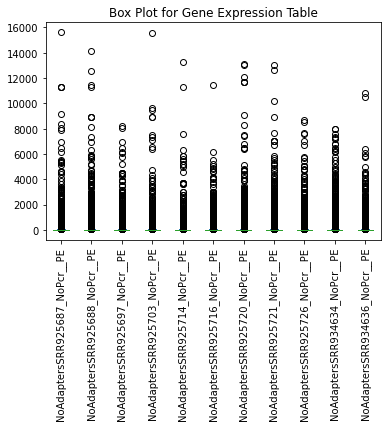

In [ ]:
#box plot for the gene expression table
GeneExpression.plot.box(rot=90, title="Box Plot for Gene Expression Table")

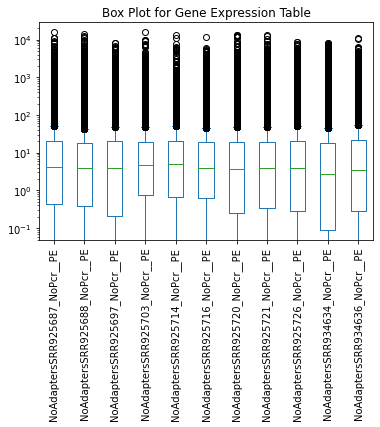

In [ ]:
#sometimes it is best to see the variation in logarithmic scale
GeneExpression.plot.box(rot=90, title="Box Plot for Gene Expression Table", logy=True)

Combine two genes into a single data frame

In [ ]:
Genes = GeneExpression.loc[["ENSG00000008988.8", "ENSG00000009694.12"]]
Genes.head()

,NoAdaptersSRR925687_NoPcr__PE,NoAdaptersSRR925688_NoPcr__PE,NoAdaptersSRR925697_NoPcr__PE,NoAdaptersSRR925703_NoPcr__PE,NoAdaptersSRR925714_NoPcr__PE,NoAdaptersSRR925716_NoPcr__PE,NoAdaptersSRR925720_NoPcr__PE,NoAdaptersSRR925721_NoPcr__PE,NoAdaptersSRR925726_NoPcr__PE,NoAdaptersSRR934634_NoPcr__PE,NoAdaptersSRR934636_NoPcr__PE
id,,,,,,,,,,,
ENSG00000008988.8,1668.91,1581.72,1557.97,1251.73,780.32,1563.27,1600.37,1314.73,897.16,2882.56,1533.07
ENSG00000009694.12,0.00,0.12,0.00,0.02,0.04,0.62,0.11,0.00,1.10,0.04,0.12


Look at the data (visually)

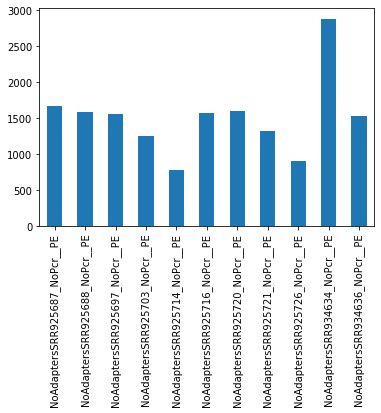

In [ ]:
Genes = Genes.transpose()
Gene1 = Genes['ENSG00000008988.8']
Gene2 = Genes['ENSG00000009694.12']

Gene1.plot.bar()

Now let's add both genes and look at those

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd97c80b3d0>,
      dtype=object)

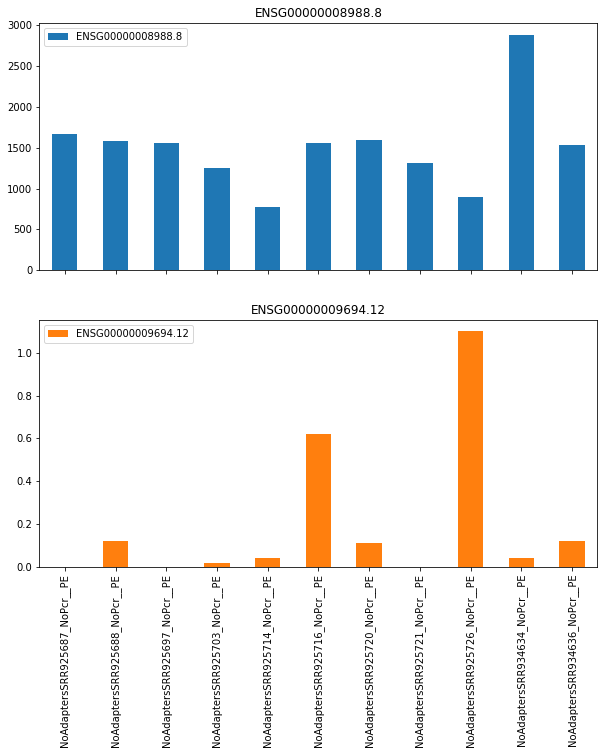

In [ ]:
Genes.plot.bar(subplots=True, figsize=(10,10))

We can compare these two genes by plotting a scatterplot:

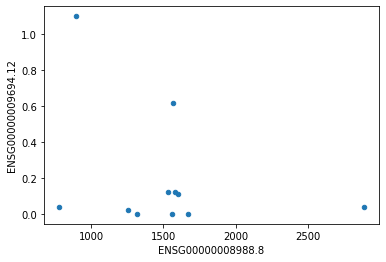

In [ ]:
Genes.plot.scatter('ENSG00000008988.8', 'ENSG00000009694.12')

The problem is that one of the genes has really low expression across all samples, so we can't even see it!

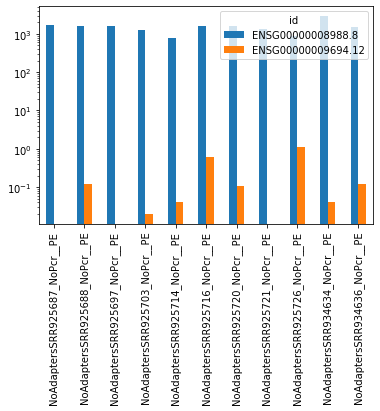

In [ ]:
Genes.plot.bar(logy=True)

Since this is a usefule sclae, we can transform the whole data frame to logarithmic scale (log transformation / scaling)

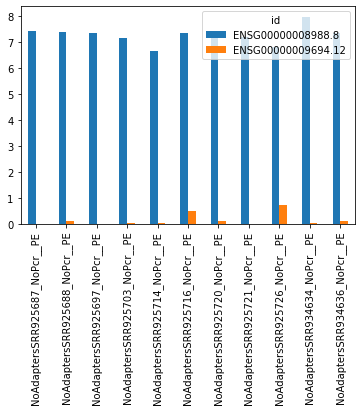

In [ ]:
Geneslog = np.log(Genes+1)

Geneslog.plot.bar()

When you have a lot of information, it is useful to summarize by group

In [ ]:
GeneExpression = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_expression_FPKM.txt')

In [ ]:
Group = ['Group','Non-malignant','Non-malignant','Cloudin-low','Cloudin-low','Cloudin-low','Cloudin-low','Cloudin-low','Cloudin-low','Non-malignant','Non-malignant','Non-malignant']
GeneExpression.iloc[0] = Group
GeneExpression

,id,NoAdaptersSRR925687_NoPcr__PE,NoAdaptersSRR925688_NoPcr__PE,NoAdaptersSRR925697_NoPcr__PE,NoAdaptersSRR925703_NoPcr__PE,NoAdaptersSRR925714_NoPcr__PE,NoAdaptersSRR925716_NoPcr__PE,NoAdaptersSRR925720_NoPcr__PE,NoAdaptersSRR925721_NoPcr__PE,NoAdaptersSRR925726_NoPcr__PE,NoAdaptersSRR934634_NoPcr__PE,NoAdaptersSRR934636_NoPcr__PE
0,Group,Non-malignant,Non-malignant,Cloudin-low,Cloudin-low,Cloudin-low,Cloudin-low,Cloudin-low,Cloudin-low,Non-malignant,Non-malignant,Non-malignant
1,ENSG00000000419.11,63.57,36.11,95.07,69.44,51.78,26.26,47.17,26.72,34.78,48.23,29.81
2,ENSG00000000457.12,2.15,3.27,2.11,4.62,2.9,2.04,3.83,2.68,3.96,2.36,1.03
3,ENSG00000000460.15,8.08,3.81,10.82,12.39,14.07,9.63,15.14,4.42,12.33,11.66,1.3
4,ENSG00000000971.14,3.15,0.39,13.77,12.78,4.89,12.79,3.1,1.86,5.9,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19984,ENSG00000281899.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.38,0.0,0.0,0.0
19985,ENSG00000281902.1,0.0,0.0,0.0,13.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19986,ENSG00000281903.1,1.37,0.52,0.0,1.34,0.74,1.2,0.23,0.9,0.0,0.0,0.0
19987,ENSG00000281905.1,0.0,0.0,0.0,35.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
GeneExpressionT = GeneExpression.transpose()
GeneExpressionT.columns=GeneExpressionT.loc['id']
GeneExpressionT

id,Group,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,ENSG00000001461.15,...,ENSG00000281844.1,ENSG00000281851.1,ENSG00000281871.1,ENSG00000281881.1,ENSG00000281884.1,ENSG00000281899.1,ENSG00000281902.1,ENSG00000281903.1,ENSG00000281905.1,ENSG00000281912.1
id,Group,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,ENSG00000001461.15,...,ENSG00000281844.1,ENSG00000281851.1,ENSG00000281871.1,ENSG00000281881.1,ENSG00000281884.1,ENSG00000281899.1,ENSG00000281902.1,ENSG00000281903.1,ENSG00000281905.1,ENSG00000281912.1
NoAdaptersSRR925687_NoPcr__PE,Non-malignant,63.57,2.15,8.08,3.15,14.29,20.59,12.23,10.36,43.61,...,1.37,0.0,0.0,0.24,2.1,0.0,0.0,1.37,0.0,0.46
NoAdaptersSRR925688_NoPcr__PE,Non-malignant,36.11,3.27,3.81,0.39,27.91,61.39,13.68,4.67,53.86,...,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.52,0.0,1.32
NoAdaptersSRR925697_NoPcr__PE,Cloudin-low,95.07,2.11,10.82,13.77,86.99,11.22,34.71,1.86,1.62,...,0.57,0.0,0.0,0.21,0.0,0.0,0.0,0.0,0.0,0.61
NoAdaptersSRR925703_NoPcr__PE,Cloudin-low,69.44,4.62,12.39,12.78,45.57,54.5,47.36,6.4,9.08,...,0.7,0.0,0.0,0.25,0.92,0.0,13.25,1.34,35.89,0.22
NoAdaptersSRR925714_NoPcr__PE,Cloudin-low,51.78,2.9,14.07,4.89,87.34,23.47,13.08,3.32,3.33,...,0.71,19.4,42.6,1.38,0.0,0.0,0.0,0.74,0.0,0.3
NoAdaptersSRR925716_NoPcr__PE,Cloudin-low,26.26,2.04,9.63,12.79,53.78,15.54,23.19,6.17,36.66,...,1.01,0.0,0.0,1.13,0.0,0.0,0.0,1.2,0.0,0.3
NoAdaptersSRR925720_NoPcr__PE,Cloudin-low,47.17,3.83,15.14,3.1,26.31,107.33,18.47,4.82,40.24,...,0.6,0.0,0.0,0.88,0.0,0.0,0.0,0.23,0.0,0.09
NoAdaptersSRR925721_NoPcr__PE,Cloudin-low,26.72,2.68,4.42,1.86,55.5,73.69,20.95,11.91,39.42,...,0.79,0.0,0.0,0.91,0.0,6.38,0.0,0.9,0.0,0.12
NoAdaptersSRR925726_NoPcr__PE,Non-malignant,34.78,3.96,12.33,5.9,66.13,16.06,15.49,8.53,26.13,...,0.2,0.0,0.0,2.52,0.0,0.0,0.0,0.0,0.0,0.24


In [ ]:
GeneExpressionT = GeneExpressionT.drop(['id'], axis = 0) 
GeneExpressionT

id,Group,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,ENSG00000001461.15,...,ENSG00000281844.1,ENSG00000281851.1,ENSG00000281871.1,ENSG00000281881.1,ENSG00000281884.1,ENSG00000281899.1,ENSG00000281902.1,ENSG00000281903.1,ENSG00000281905.1,ENSG00000281912.1
NoAdaptersSRR925687_NoPcr__PE,Non-malignant,63.57,2.15,8.08,3.15,14.29,20.59,12.23,10.36,43.61,...,1.37,0.0,0.0,0.24,2.1,0.0,0.0,1.37,0.0,0.46
NoAdaptersSRR925688_NoPcr__PE,Non-malignant,36.11,3.27,3.81,0.39,27.91,61.39,13.68,4.67,53.86,...,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.52,0.0,1.32
NoAdaptersSRR925697_NoPcr__PE,Cloudin-low,95.07,2.11,10.82,13.77,86.99,11.22,34.71,1.86,1.62,...,0.57,0.0,0.0,0.21,0.0,0.0,0.0,0.0,0.0,0.61
NoAdaptersSRR925703_NoPcr__PE,Cloudin-low,69.44,4.62,12.39,12.78,45.57,54.5,47.36,6.4,9.08,...,0.7,0.0,0.0,0.25,0.92,0.0,13.25,1.34,35.89,0.22
NoAdaptersSRR925714_NoPcr__PE,Cloudin-low,51.78,2.9,14.07,4.89,87.34,23.47,13.08,3.32,3.33,...,0.71,19.4,42.6,1.38,0.0,0.0,0.0,0.74,0.0,0.3
NoAdaptersSRR925716_NoPcr__PE,Cloudin-low,26.26,2.04,9.63,12.79,53.78,15.54,23.19,6.17,36.66,...,1.01,0.0,0.0,1.13,0.0,0.0,0.0,1.2,0.0,0.3
NoAdaptersSRR925720_NoPcr__PE,Cloudin-low,47.17,3.83,15.14,3.1,26.31,107.33,18.47,4.82,40.24,...,0.6,0.0,0.0,0.88,0.0,0.0,0.0,0.23,0.0,0.09
NoAdaptersSRR925721_NoPcr__PE,Cloudin-low,26.72,2.68,4.42,1.86,55.5,73.69,20.95,11.91,39.42,...,0.79,0.0,0.0,0.91,0.0,6.38,0.0,0.9,0.0,0.12
NoAdaptersSRR925726_NoPcr__PE,Non-malignant,34.78,3.96,12.33,5.9,66.13,16.06,15.49,8.53,26.13,...,0.2,0.0,0.0,2.52,0.0,0.0,0.0,0.0,0.0,0.24
NoAdaptersSRR934634_NoPcr__PE,Non-malignant,48.23,2.36,11.66,0.0,36.29,21.28,17.0,2.86,42.74,...,0.69,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.38


In [ ]:
GeneExpressionT.set_index(['Group'])

id,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,ENSG00000001461.15,ENSG00000001497.15,...,ENSG00000281844.1,ENSG00000281851.1,ENSG00000281871.1,ENSG00000281881.1,ENSG00000281884.1,ENSG00000281899.1,ENSG00000281902.1,ENSG00000281903.1,ENSG00000281905.1,ENSG00000281912.1
Group,,,,,,,,,,,,,,,,,,,,,
Non-malignant,63.57,2.15,8.08,3.15,14.29,20.59,12.23,10.36,43.61,36.55,...,1.37,0.0,0.0,0.24,2.1,0.0,0.0,1.37,0.0,0.46
Non-malignant,36.11,3.27,3.81,0.39,27.91,61.39,13.68,4.67,53.86,17.77,...,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.52,0.0,1.32
Cloudin-low,95.07,2.11,10.82,13.77,86.99,11.22,34.71,1.86,1.62,69.54,...,0.57,0.0,0.0,0.21,0.0,0.0,0.0,0.0,0.0,0.61
Cloudin-low,69.44,4.62,12.39,12.78,45.57,54.5,47.36,6.4,9.08,31.19,...,0.7,0.0,0.0,0.25,0.92,0.0,13.25,1.34,35.89,0.22
Cloudin-low,51.78,2.9,14.07,4.89,87.34,23.47,13.08,3.32,3.33,81.98,...,0.71,19.4,42.6,1.38,0.0,0.0,0.0,0.74,0.0,0.3
Cloudin-low,26.26,2.04,9.63,12.79,53.78,15.54,23.19,6.17,36.66,28.66,...,1.01,0.0,0.0,1.13,0.0,0.0,0.0,1.2,0.0,0.3
Cloudin-low,47.17,3.83,15.14,3.1,26.31,107.33,18.47,4.82,40.24,37.36,...,0.6,0.0,0.0,0.88,0.0,0.0,0.0,0.23,0.0,0.09
Cloudin-low,26.72,2.68,4.42,1.86,55.5,73.69,20.95,11.91,39.42,26.13,...,0.79,0.0,0.0,0.91,0.0,6.38,0.0,0.9,0.0,0.12
Non-malignant,34.78,3.96,12.33,5.9,66.13,16.06,15.49,8.53,26.13,42.61,...,0.2,0.0,0.0,2.52,0.0,0.0,0.0,0.0,0.0,0.24


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd97c9a0110>,
      dtype=object)

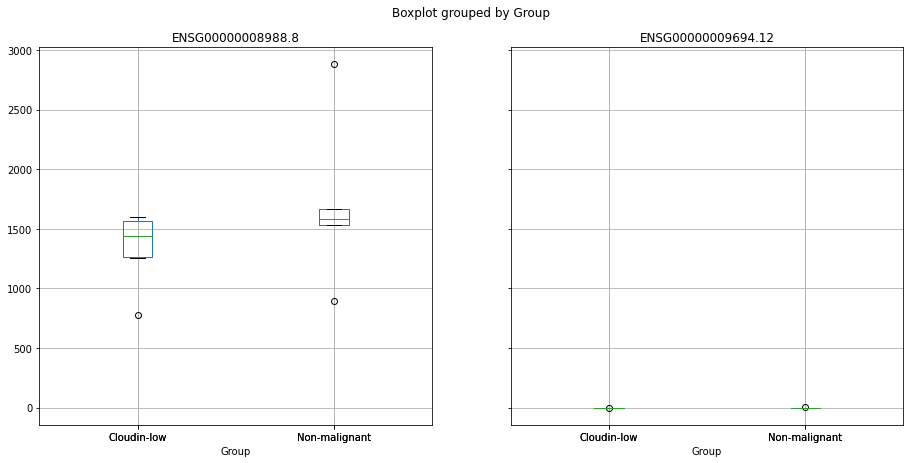

In [ ]:
GeneExpressionT.boxplot(column=['ENSG00000008988.8', 'ENSG00000009694.12'], by='Group',figsize=(15, 7))

# Class Work September 12, 2022

In [ ]:
import pandas as pd
import numpy as np

GeneExpression = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_expression_FPKM.txt')
GeneExpression.index = GeneExpression['id']
GeneExpression = GeneExpression.drop(['id'], axis=1)
GeneExpression

,NoAdaptersSRR925687_NoPcr__PE,NoAdaptersSRR925688_NoPcr__PE,NoAdaptersSRR925697_NoPcr__PE,NoAdaptersSRR925703_NoPcr__PE,NoAdaptersSRR925714_NoPcr__PE,NoAdaptersSRR925716_NoPcr__PE,NoAdaptersSRR925720_NoPcr__PE,NoAdaptersSRR925721_NoPcr__PE,NoAdaptersSRR925726_NoPcr__PE,NoAdaptersSRR934634_NoPcr__PE,NoAdaptersSRR934636_NoPcr__PE
id,,,,,,,,,,,
ENSG00000000003.13,9.14,10.12,13.89,11.67,20.89,5.99,8.11,9.28,12.07,1.54,1.73
ENSG00000000419.11,63.57,36.11,95.07,69.44,51.78,26.26,47.17,26.72,34.78,48.23,29.81
ENSG00000000457.12,2.15,3.27,2.11,4.62,2.90,2.04,3.83,2.68,3.96,2.36,1.03
ENSG00000000460.15,8.08,3.81,10.82,12.39,14.07,9.63,15.14,4.42,12.33,11.66,1.30
ENSG00000000971.14,3.15,0.39,13.77,12.78,4.89,12.79,3.10,1.86,5.90,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000281899.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.38,0.00,0.00,0.00
ENSG00000281902.1,0.00,0.00,0.00,13.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000281903.1,1.37,0.52,0.00,1.34,0.74,1.20,0.23,0.90,0.00,0.00,0.00


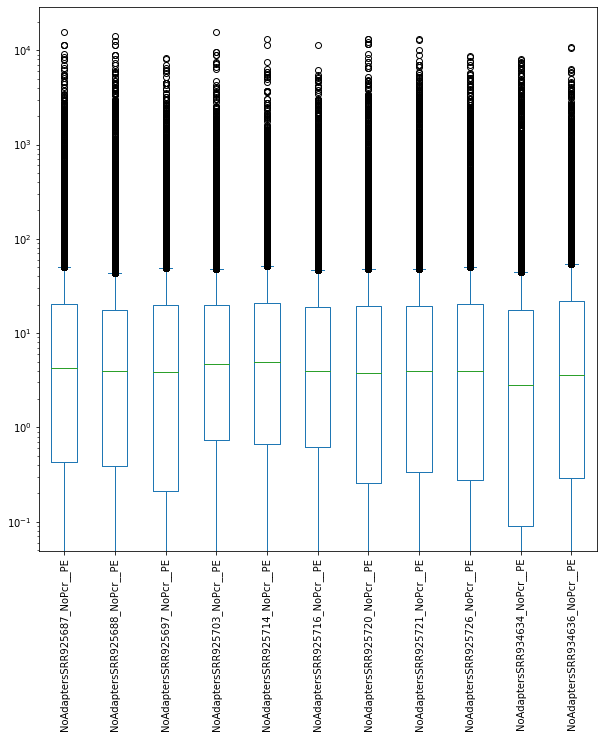

In [ ]:
GeneExpression.plot.box(rot=90, figsize=(10, 10), logy=True)

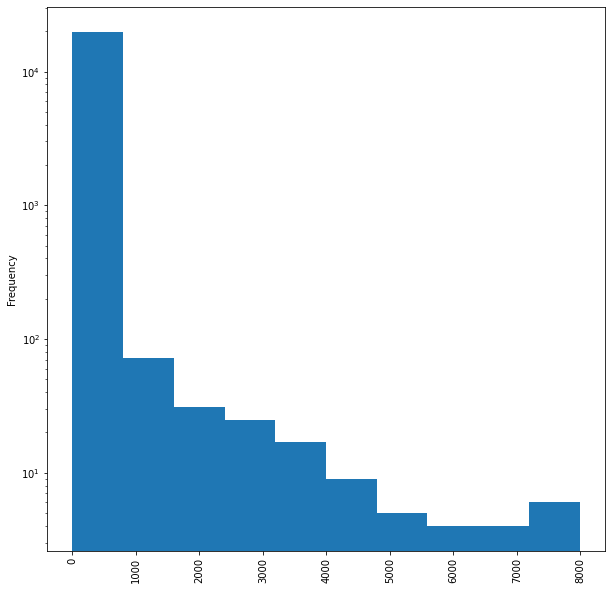

In [ ]:
GeneExpression['NoAdaptersSRR934634_NoPcr__PE'].plot.hist(rot=90, figsize=(10, 10), logy=True)

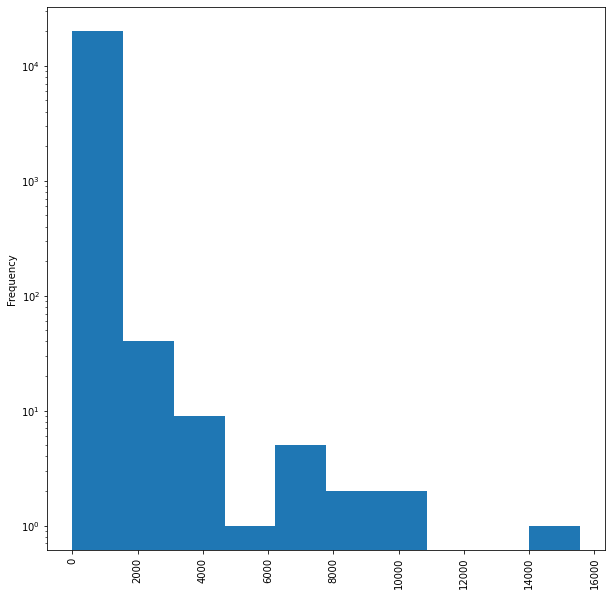

In [ ]:
GeneExpression['NoAdaptersSRR925703_NoPcr__PE'].plot.hist(rot=90, figsize=(10, 10), logy=True)

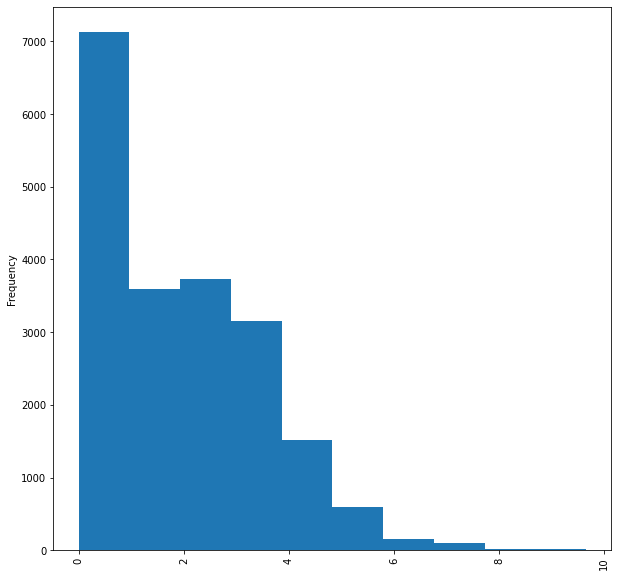

In [ ]:
GeneExpression1 = np.log(GeneExpression + 1)
GeneExpression1['NoAdaptersSRR925703_NoPcr__PE'].plot.hist(rot=90, figsize=(10, 10))

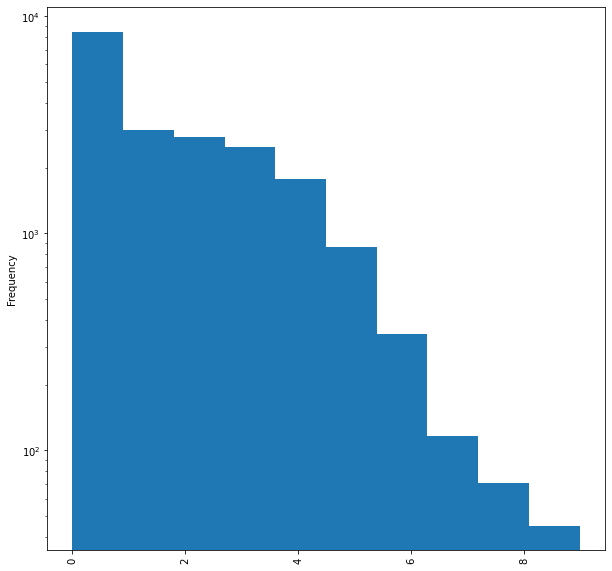

In [ ]:
GeneExpression1['NoAdaptersSRR934634_NoPcr__PE'].plot.hist(rot=90, figsize=(10, 10), logy=True)

In [ ]:
GeneExpression1

,NoAdaptersSRR925687_NoPcr__PE,NoAdaptersSRR925688_NoPcr__PE,NoAdaptersSRR925697_NoPcr__PE,NoAdaptersSRR925703_NoPcr__PE,NoAdaptersSRR925714_NoPcr__PE,NoAdaptersSRR925716_NoPcr__PE,NoAdaptersSRR925720_NoPcr__PE,NoAdaptersSRR925721_NoPcr__PE,NoAdaptersSRR925726_NoPcr__PE,NoAdaptersSRR934634_NoPcr__PE,NoAdaptersSRR934636_NoPcr__PE
id,,,,,,,,,,,
ENSG00000000003.13,2.316488,2.408745,2.700690,2.539237,3.086030,1.944481,2.209373,2.330200,2.570320,0.932164,1.004302
ENSG00000000419.11,4.167750,3.613886,4.565077,4.254761,3.966132,3.305420,3.874736,3.322154,3.577389,3.896503,3.427839
ENSG00000000457.12,1.147402,1.451614,1.134623,1.726332,1.360977,1.111858,1.574846,1.302913,1.601406,1.211941,0.708036
ENSG00000000460.15,2.206074,1.570697,2.469793,2.594508,2.712706,2.363680,2.781301,1.690096,2.590017,2.538447,0.832909
ENSG00000000971.14,1.423108,0.329304,2.692598,2.623218,1.773256,2.623944,1.410987,1.050822,1.931521,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000281899.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.998774,0.000000,0.000000,0.000000
ENSG00000281902.1,0.000000,0.000000,0.000000,2.656757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000281903.1,0.862890,0.418710,0.000000,0.850151,0.553885,0.788457,0.207014,0.641854,0.000000,0.000000,0.000000


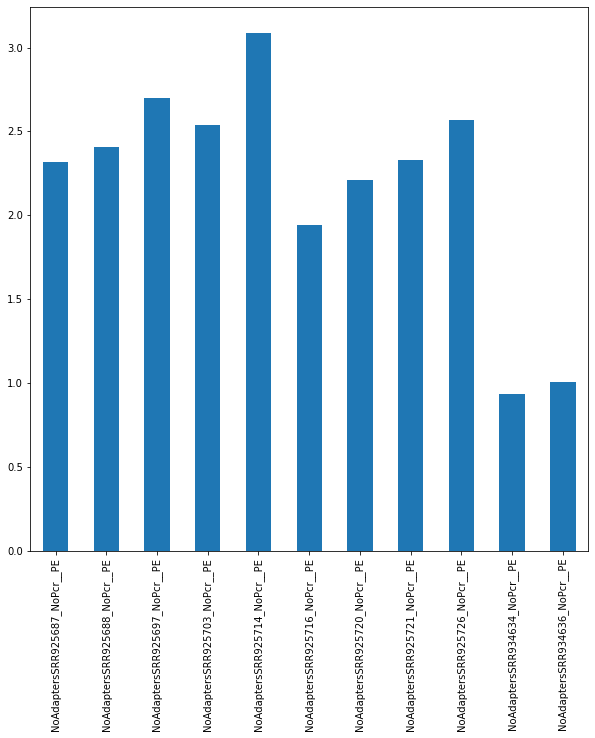

In [ ]:
GeneExpressionT = GeneExpression1.transpose()
GeneExpressionT['ENSG00000000003.13'].plot.bar(figsize=(10, 10))

In [ ]:
sample_names = GeneExpression1.columns
gene_names = GeneExpression1.index
gene_names

Index(['ENSG00000000003.13', 'ENSG00000000419.11', 'ENSG00000000457.12',
       'ENSG00000000460.15', 'ENSG00000000971.14', 'ENSG00000001036.12',
       'ENSG00000001084.9', 'ENSG00000001167.13', 'ENSG00000001460.16',
       'ENSG00000001461.15',
       ...
       'ENSG00000281844.1', 'ENSG00000281851.1', 'ENSG00000281871.1',
       'ENSG00000281881.1', 'ENSG00000281884.1', 'ENSG00000281899.1',
       'ENSG00000281902.1', 'ENSG00000281903.1', 'ENSG00000281905.1',
       'ENSG00000281912.1'],
      dtype='object', name='id', length=19989)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(GeneExpressionT)

pca.explained_variance_ratio_

array([0.29312719, 0.17033254, 0.10370629])

In [ ]:
xpca = pca.transform(GeneExpressionT)
PCAdf = pd.DataFrame(data = xpca)
PCAdf.index = sample_names
PCAdf

,0,1,2
NoAdaptersSRR925687_NoPcr__PE,41.146644,-14.310768,2.468041
NoAdaptersSRR925688_NoPcr__PE,63.179222,-17.519508,-34.899516
NoAdaptersSRR925697_NoPcr__PE,-42.687739,4.392604,22.732767
NoAdaptersSRR925703_NoPcr__PE,-62.284666,-43.290716,-48.968365
NoAdaptersSRR925714_NoPcr__PE,-61.449528,-36.365359,-11.611782
NoAdaptersSRR925716_NoPcr__PE,-47.994831,18.507541,27.326553
NoAdaptersSRR925720_NoPcr__PE,43.191669,-19.613217,6.917740
NoAdaptersSRR925721_NoPcr__PE,49.621165,-2.576174,9.476330
NoAdaptersSRR925726_NoPcr__PE,-16.862044,-9.048410,55.869099
NoAdaptersSRR934634_NoPcr__PE,58.084765,18.676645,1.133895


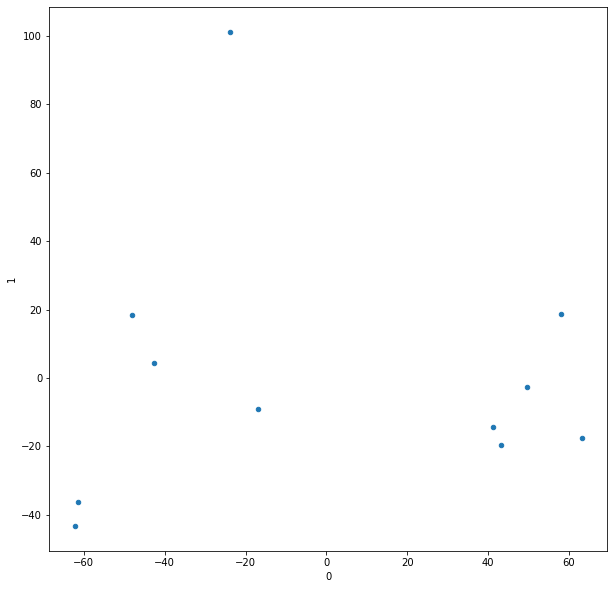

In [ ]:
PCAdf.plot.scatter(x=0, y=1, figsize=(10, 10))

In [ ]:
pip install dash --q

In [ ]:
labels = {str(i): f'PC{i+1}: {pca.explained_variance_ratio_[i] * 100:.2f}%' for i in range(pca.n_components_)}
labels

{'0': 'PC1: 29.31%', '1': 'PC2: 17.03%', '2': 'PC3: 10.37%'}

In [ ]:
import plotly.express as px

fig = px.scatter_3d(PCAdf, x=0, y=1, z=2, color=sample_names, labels=labels)
fig.update_layout(height=1000, width=1000, title_text='PCA Results')
fig.show()

In [ ]:
df1 = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_15Genes_marked.txt', sep='\t', header=(0))
df1.index = df1.id
df1 = df1.drop('id', axis=1)

groups = df1.loc['Group']
sample_names = df1.columns
gene_names = df1.index
df1 = df1.drop('Group', axis=0)

Index(['Group', 'ENSG00000011465', 'ENSG00000057149', 'ENSG00000065618',
       'ENSG00000083720', 'ENSG00000095139', 'ENSG00000104413',
       'ENSG00000105185', 'ENSG00000110917', 'ENSG00000112511',
       'ENSG00000116299', 'ENSG00000119888', 'ENSG00000143771',
       'ENSG00000160180', 'ENSG00000166145', 'ENSG00000198125'],
      dtype='object', name='id')

In [ ]:
# run PCA
pca = PCA(n_components=3)
pca.fit(df1.T)
xpca = pca.transform(df1.T)

# create datafram
PCAdf = pd.DataFrame(data = xpca)
PCAdf.index = sample_names

# assign labels
labels = {str(i): f'PC{i+1}: {pca.explained_variance_ratio_[i] * 100:.2f}%' for i in range(pca.n_components_)}

# plot PCA scatterplot
fig = px.scatter_3d(PCAdf, x=0, y=1, z=2, color=groups, labels=labels)
fig.update_layout(height=750, width=750, title_text='PCA Results')
fig.show()

# Class Work September 26, 2022

In [ ]:
!pip install researchpy --q

In [ ]:
import pandas as pd
import numpy as np
import scipy as scipy
import researchpy as rp
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [ ]:
GeneExpression = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt')

GeneExpression

,Id,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
0,class,LIHC_TP,LIHC_TP,LIHC_TP,LIHC_NT,LIHC_NT,LIHC_NT,BRCA_TP,BRCA_TP,BRCA_TP,BRCA_NT,BRCA_NT,BRCA_NT
1,a100130426,0,0,0,0,0,0,0,0.9066,0,0,0,0
2,a100133144,2.31,53.59,6.86,2,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.055
3,a100134869,5.69,5.41,6.14,0,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0
4,a10357,138.3,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.638,87.5764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,ZYX|7791,4869,10756,3708,2799,1661,4915,3507.2482,5458.7489,5691.3529,6455.873,6038.9281,2344.7047
20528,ZZEF1|23140,1366,1533,1606,493,320,638,1894.9342,942.883,781.1336,1314.2857,1477.386,1997.9633
20529,ZZZ3|26009,783,1746,412,486,694,482,1180.4565,509.5195,700.8688,968.254,620.9685,730.6517
20530,psiTPTE22|387590,6,13,3,14,2,13,1.7233,35.3581,66.6115,265.3968,466.7607,346.7413


In [ ]:
GeneExpression.index = GeneExpression.Id

sample_class = GeneExpression.loc['class']

GeneExpression = GeneExpression.drop(['class'], axis = 0)
GeneExpression = GeneExpression.drop(['Id'], axis = 1)

GeneExpressionNum = GeneExpression.apply(pd.to_numeric)
GeneExpressionNum.index = GeneExpressionNum.index.str.replace('|', "_")

GeneExpressionNum

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
Id,,,,,,,,,,,,
a100130426,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000
a100133144,2.31,53.59,6.86,2.00,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.0550
a100134869,5.69,5.41,6.14,0.00,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0.0000
a10357,138.30,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.6380,87.5764
a10431,1561.00,1297.00,1423.00,1454.00,1125.00,2128.00,408.0760,1360.8341,865.5358,978.4127,970.7569,770.3666
...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX_7791,4869.00,10756.00,3708.00,2799.00,1661.00,4915.00,3507.2482,5458.7489,5691.3529,6455.8730,6038.9281,2344.7047
ZZEF1_23140,1366.00,1533.00,1606.00,493.00,320.00,638.00,1894.9342,942.8830,781.1336,1314.2857,1477.3860,1997.9633
ZZZ3_26009,783.00,1746.00,412.00,486.00,694.00,482.00,1180.4565,509.5195,700.8688,968.2540,620.9685,730.6517


In [ ]:
TumorExpression_LIHC = GeneExpressionNum.iloc[:, 0:3]
TumorExpression_BRCA = GeneExpressionNum.iloc[:, 6:9]

TumorExpression = pd.concat([TumorExpression_BRCA, TumorExpression_LIHC], join='outer', axis=1)
TumorExpression

,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP
Id,,,,,,
a100130426,0.0000,0.9066,0.0000,0.00,0.00,0.00
a100133144,16.3644,11.6228,12.0894,2.31,53.59,6.86
a100134869,12.9316,9.2294,11.0799,5.69,5.41,6.14
a10357,52.1503,154.2974,143.8643,138.30,144.07,73.93
a10431,408.0760,1360.8341,865.5358,1561.00,1297.00,1423.00
...,...,...,...,...,...,...
ZYX_7791,3507.2482,5458.7489,5691.3529,4869.00,10756.00,3708.00
ZZEF1_23140,1894.9342,942.8830,781.1336,1366.00,1533.00,1606.00
ZZZ3_26009,1180.4565,509.5195,700.8688,783.00,1746.00,412.00


In [ ]:
NTLIHC = GeneExpressionNum.iloc[:, 3: 6]
NTBRCA = GeneExpressionNum.iloc[:, 9: ]

NTExpression = pd.concat([NTBRCA, NTLIHC], join='outer', axis=1)
NTExpression

,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT
Id,,,,,,
a100130426,0.0000,0.0000,0.0000,0.00,0.00,0.00
a100133144,4.3333,4.2087,3.0550,2.00,1.41,4.94
a100134869,3.9206,2.1852,0.0000,0.00,2.59,1.06
a10357,78.9238,53.6380,87.5764,103.92,96.89,97.03
a10431,978.4127,970.7569,770.3666,1454.00,1125.00,2128.00
...,...,...,...,...,...,...
ZYX_7791,6455.8730,6038.9281,2344.7047,2799.00,1661.00,4915.00
ZZEF1_23140,1314.2857,1477.3860,1997.9633,493.00,320.00,638.00
ZZZ3_26009,968.2540,620.9685,730.6517,486.00,694.00,482.00


In [ ]:
result = scipy.stats.ttest_ind(TumorExpression, NTExpression, equal_var=True, axis=1).pvalue
GeneExpressionNum1 = GeneExpressionNum.copy(deep=True)
GeneExpressionNum1['p-value'] = result
GeneExpressionNum1

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT,p-value
Id,,,,,,,,,,,,,
a100130426,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000,0.340893
a100133144,2.31,53.59,6.86,2.00,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.0550,0.098109
a100134869,5.69,5.41,6.14,0.00,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0.0000,0.000810
a10357,138.30,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.6380,87.5764,0.131917
a10431,1561.00,1297.00,1423.00,1454.00,1125.00,2128.00,408.0760,1360.8341,865.5358,978.4127,970.7569,770.3666,0.756878
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX_7791,4869.00,10756.00,3708.00,2799.00,1661.00,4915.00,3507.2482,5458.7489,5691.3529,6455.8730,6038.9281,2344.7047,0.259592
ZZEF1_23140,1366.00,1533.00,1606.00,493.00,320.00,638.00,1894.9342,942.8830,781.1336,1314.2857,1477.3860,1997.9633,0.348045
ZZZ3_26009,783.00,1746.00,412.00,486.00,694.00,482.00,1180.4565,509.5195,700.8688,968.2540,620.9685,730.6517,0.322508


In [ ]:
GeneExpressionNum1_sig = GeneExpressionNum1.loc[GeneExpressionNum1['p-value'] < 0.05]
GeneExpressionNum1_sig

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT,p-value
Id,,,,,,,,,,,,,
a100134869,5.69,5.41,6.14,0.00,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0.0000,0.000810
a155060,217.00,249.00,336.00,32.00,7.00,63.00,1187.0050,592.0218,552.7513,219.0476,136.1542,109.9796,0.017527
a653553,1215.00,1089.00,402.00,201.00,237.00,351.00,289.5134,1100.6346,406.2888,170.4762,318.9469,102.3422,0.015150
A2ML1_144568,0.00,0.00,2.00,3.00,0.00,1.00,1.3786,0.0000,1.6549,16.8254,19.5581,22.9124,0.044667
AARS2_57505,522.00,1381.89,590.80,313.00,178.89,337.99,689.8967,439.7099,431.9363,485.0413,349.5477,225.5550,0.039944
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN2_54993,691.00,1182.00,482.00,118.00,112.00,139.00,582.4734,268.3590,304.9235,291.1111,301.6455,349.2872,0.028246
ZSWIM1_90204,194.00,542.00,305.00,94.00,100.00,118.00,431.5128,352.6745,286.3053,250.1587,204.2313,161.4053,0.005420
ZWILCH_55055,326.00,1098.46,395.46,98.92,77.82,81.78,415.8240,305.4216,394.5056,247.8190,161.1547,98.2688,0.016688


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

GeneExpressionNumT = GeneExpressionNum.transpose()

scaled = StandardScaler()
scaled.fit(GeneExpressionNumT)
scaled_data = scaled.transform(GeneExpressionNumT)

pca = PCA(n_components=2)
pca.fit(scaled_data)
xpca = pca.transform(scaled_data)

xpca.shape

(12, 2)

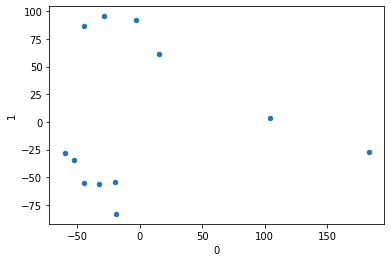

In [ ]:
PCAdf = pd.DataFrame(xpca)
PCAdf.index = sample_class[1:]
PCAdf.plot.scatter(x=0, y=1)